<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/Exercicio_Atletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercícios 5 - 120 years of Olympic history: athletes and results
* [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results)
    * Trate adequadamente as variáveis 'sex', 'season', 'team', 'city', 'sport' e 'medal';
    * Aplique as transformações que acabamos de estudar nos campos/colunas numéricas 'height' e 'weight'. Cuidado com os Missing Values contidos nas variáveis!
    * Verifique/avalie o impacto dos outliers nestas colunas.
    * Neste caso, qual transformação é mais adequado diante dos outliers?

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install category_encoders
!pip install update
import category_encoders as ce
from sklearn import preprocessing

     |████████████████████████████████| 81kB 2.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
df_atletas_original = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/athlete_events.csv')

In [31]:
df_atletas = df_atletas_original.copy()

In [16]:
df_noc_original = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/noc_regions.csv')


In [32]:
df_noc = df_noc_original.copy()

In [6]:
df_atletas.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
129477,65180,Wojciech Sawomir Kurpiewski,M,26.0,187.0,90.0,Poland,POL,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN
103446,52341,Atsushi Irei,M,25.0,161.0,58.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Flyweight,NaN
75593,38381,Jana Gantnerov,F,16.0,165.0,65.0,Slovakia,SVK,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Women's Super G,NaN
184542,92755,Mari Heini Emilia Pehkonen,F,21.0,170.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ice Hockey,Ice Hockey Women's Ice Hockey,NaN
82559,41938,Christine Lorraine Gosden,F,17.0,179.0,71.0,Great Britain,GBR,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 200 metres Breaststroke,NaN


In [7]:
df_noc.sample(5)

,NOC,region,notes
51,CRT,Greece,Crete
127,MAW,Malawi,NaN
66,EUN,Russia,NaN
73,GAM,Gambia,NaN
109,KOR,South Korea,NaN


Tratando os nomes das colunas

In [33]:
df_atletas.columns = df_atletas.columns.str.lower()
df_noc.columns = df_noc.columns.str.lower()

Trocando os Index

In [34]:
df_atletas = df_atletas.set_index('id')
df_noc = df_noc.set_index('noc')

Missing Values

In [19]:
df_atletas.isna().sum()

name           0
sex            0
age         9474
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
dtype: int64

In [40]:
df_atletas.value_counts()

name                        sex  age   height  weight  team           noc  games        year  season  city            sport             event                                               medal      height_notna  weight_notna  age_notna  sex_num  season_num  team_num  city_num  sport_num  medal_num
Louis Hechenbleikner        M    38.0  178.0   67.0    United States  USA  1932 Summer  1932  Summer  Los Angeles     Art Competitions  Art Competitions Mixed Painting, Unknown Event      No_Medals  178.0         67.0          38.0       1        0           1095      18        4          2            5
Gavin Hadden                M    44.0  188.0   77.0    United States  USA  1932 Summer  1932  Summer  Los Angeles     Art Competitions  Art Competitions Mixed Architecture, Unknown Event  No_Medals  188.0         77.0          44.0       1        0           1095      18        4          2            4
Jerzy Walerian Skolimowski  M    24.0  150.0   59.0    Poland         POL  1932 Summer  19

Missing Values - variável categórica - troquei por "No_Medals"

In [13]:
df_atletas['medal'][df_atletas['medal'].isna()]

Series([], Name: medal, dtype: object)

In [35]:
df_atletas['medal'] = df_atletas['medal'].fillna('No_Medals')

In [ ]:
df_atletas['medal']

id
1         No_Medals
2         No_Medals
3         No_Medals
4              Gold
5         No_Medals
            ...    
135569    No_Medals
135570    No_Medals
135570    No_Medals
135571    No_Medals
135571    No_Medals
Name: medal, Length: 271116, dtype: object

Missing Values - Variáveis numéricas - Troquei por mediana

In [36]:
df_atletas[['height_notna','weight_notna','age_notna']] = df_atletas[['height','weight','age']].fillna(df_atletas[['height','weight','age']].median()) 

Tratamento das variáveis 'sex', 'season', 'team', 'city', 'sport' e 'medal'

In [39]:
le = preprocessing.LabelEncoder()
l_var = ['sex','season','team','city','sport','medal']
#s_var_num = []
for y in l_var:
    s_var_num = y + '_num'
    #df_atletas[s_var_num] = imp.fit_transform(df_atletas[y])
    df_atletas[s_var_num] = df_atletas[y].replace()
    #print(df_atletas[y])
    #df_atletas[s_var_num] = 
    df_atletas[s_var_num] = le.fit_transform(df_atletas[s_var_num])
df_atletas.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,height_notna,weight_notna,age_notna,sex_num,season_num,team_num,city_num,sport_num,medal_num
id,,,,,,,,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medals,180.0,80.0,24.0,1,0,198,5,8,2
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medals,170.0,60.0,23.0,1,0,198,17,32,2
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medals,175.0,70.0,24.0,1,0,273,2,24,2
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,175.0,70.0,34.0,1,0,278,26,61,1
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medals,185.0,82.0,21.0,0,1,704,8,53,2


Comparando as distribuições de height e weight antes e depois do tratamento dos Missing Values

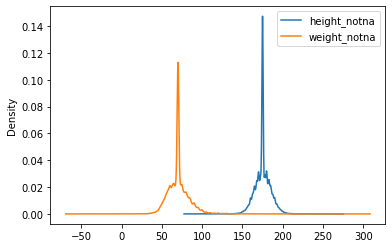

In [ ]:
df_atletas[['height_notna','weight_notna']].plot(kind = 'kde')

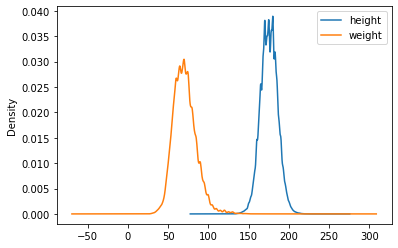

In [ ]:
df_atletas[['height','weight']].plot(kind = 'kde')

Aplicando as Transformações

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_atletas[['height_std','weight_std']] = StandardScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) # Combinação dos métodos fit() + transform()

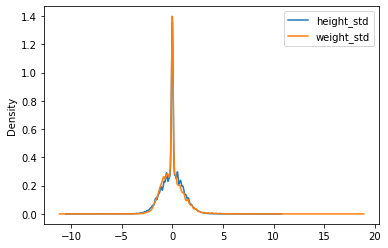

In [ ]:
df_atletas[['height_std','weight_std']].plot(kind = 'kde')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

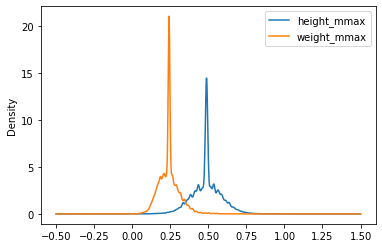

In [ ]:
df_atletas[['height_mmax','weight_mmax']] = MinMaxScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) 
df_atletas[['height_mmax','weight_mmax']].plot(kind = 'kde')

In [ ]:
from sklearn.preprocessing import RobustScaler

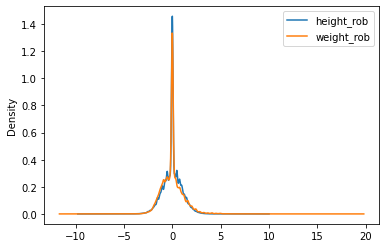

In [ ]:
df_atletas[['height_rob','weight_rob']] = RobustScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) 
df_atletas[['height_rob','weight_rob']].plot(kind = 'kde')

In [41]:
import numpy as np 
from scipy import stats 

In [45]:
# Gráficos: 
def compara_graficos(y, w, lambda_box_cox):
    fig, ax = plt.subplots(1, 2) 
  
    # Gráfico das distribuições originais e transformada
    sns.distplot(y, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = "Non-Normal", color ="green", ax = ax[0]) 
    sns.distplot(w, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = "Normal", color ="green", ax = ax[1]) 
  
    # Legendas 
    plt.legend(loc = "upper right") 
  
    # Redimensionando os sub-gráficos 
    fig.set_figheight(5) 
    fig.set_figwidth(10) 
    
    print(f"Valor de Lambda usado na transformação: {lambda_box_cox}") 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 0.9230638070579792


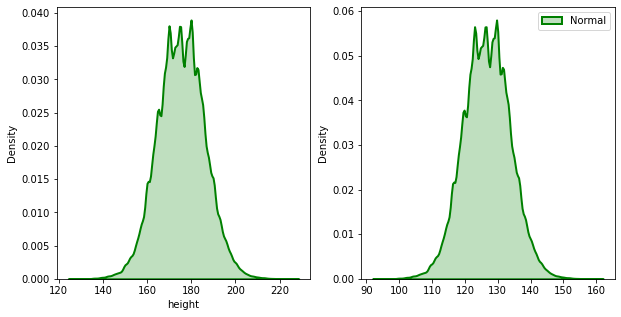

In [51]:
box_cox, lambda_box_cox = stats.boxcox(df_atletas['height'][df_atletas['height'].notna()]) 
compara_graficos(df_atletas['height'], box_cox, lambda_box_cox)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Valor de Lambda usado na transformação: 1


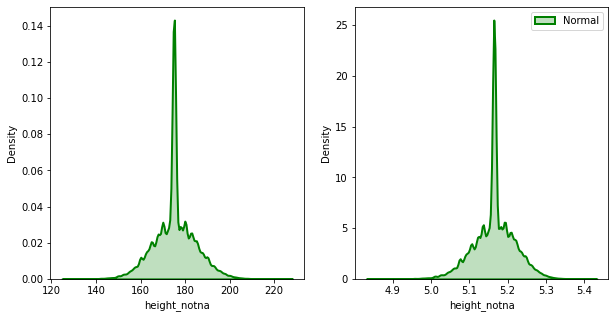

In [47]:
transformacao_log = np.log(df_atletas['height_notna'])
compara_graficos(df_atletas['height_notna'], transformacao_log, 1)